%%html
<!-- Script Block to set tables to left alignment -->
<style>
  table {margin-left: 0 !important;}
</style>

# Interpolation, Integration, Differentiation of Functions and Tabular Data

## Interpolation

The Starship rocket in the figure below sends a lot of telemetry data to both on-board and off-board (ground-based) control computers.  

![https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.jpg/800px-SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.jpg](800px-SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.png)

Suppose telemetry is received every 1/10 of a second, providing the altitude (position) of the craft, something like the figure below.

![](altitude-time.png)

How can one estimate the altitude at intermediate times (between the 1/10 of a second "true" values)?

The problem is a type of interpolation problem similar to calculating water density from tables for intermediate values by assuming a straight line passed between the two values from the table. However it may not be appropriate to assume that the altitudes are linear with time.  The special challenge comes when we want to estimate intermediate values when there is a maximum or minimum in the tabular structure, and we will have to process many records for different cases.

The classical approach to such a problem is to fit a polynomial to the tabular results and interrogate the resulting polynomial to obtain estimates of the intermediate values.  This prediction engine (the polynomial) is required to return the exact value at a observation location (in our case a 1/10 second interval).  This requirement is quite distinct from other types of prediction engines we will study.

### Lagrangian Interpolation

Polynomial interpolation is the method of determining a polynomial that fits a set of given points. There are several approaches to polynomial interpolation, of which one of the most well known is the Lagrangian method. The Lagrangian polynomial [https://en.wikipedia.org/wiki/Lagrange_polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial) is the polynomial of order $n-1$, where $n$ is he number of tabular data pairs we wish to interpolate. 

Suppose we have a table of data (or telemetry sent back from our rocket), of $x-$ and $f(x)$-values:

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|$$x_1$$ |$$f_1$$|
|$$x_2$$   |$$f_2$$|
|$$x_3$$   |$$f_3$$|
|$$x_4$$ |$$f_4$$|

The highest order polynomial that can be passed through these four data pairs is a cubic.  A Lagrangian form for such a cubic is

$$ P_3(x) = f(x_1)\frac{(x-x_2)(x-x_3)(x-x_4)}{(x_1-x_2)(x_1-x_3)(x_1-x_4)} + f(x_2)\frac{(x-x_1)(x-x_3)(x-x_4)}{(x_2-x_1)(x_2-x_3)(x_2-x_4)} + f(x_3)\frac{(x-x_1)(x-x_2)(x-x_4)}{(x_3-x_1)(x_3-x_2)(x_3-x_4)} +f(x_4)\frac{(x-x_1)(x-x_2)(x-x_3)}{(x_4-x_1)(x_4-x_2)(x_4-x_3)} $$

Notice that it is constructed of four terms, each of which is a cubic in $x$; hence the sum is a cubic also.  The pattern of each term is to form the numerator as a product of differences of the form $(x-x_i)$, omitting one $x_i$ in each term, the ommitted term is used in the denominator as a replacement for $x$ in each position in the numerator.  In each term, the difference factor is multiplied by the value $f_i$ corresponding to the $x_i$ ommitted in the numerator. The Lagragian polynomial for other degrees of interpolating polynomials employs this same pattern of forming a sum of polynomials of the desired degree. 

Of importance is that the polynomial is intended to be used for interpolation, that is the value we seek $P(x^*)$ assumes we will supply $x^*$ in the range $[x_1 , x_4]$.  Going outside this range is called extrapolation, and interpolator-type prediction engines are the wromg tool!


### Example 1

Consider the three observations below, estimate (predict) the value for $f(2.3).

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|1.1  |10.6|
|1.7  |15.2|
|3.0  |20.3|

The Lagrangian form of the highest order of polynomial that can pass through the 3 data pairs is the quadratic:

$$ P_2(x) = f(x_1)\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)} + f(x_2)\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)} + f(x_3)\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)} $$

Once the denominators are completed, it is relatively straightforward to compute the estimate (prediction), in this case

$$ P_2(x) = (10.6)\frac{(x-1.7)(x-3.0)}{(1.1-1.7)(1.1-3.0)} + (15.2)\frac{(x-1.1)(x-3.0)}{(1.7-1.1)(1.7-3.0)} + (20.3)\frac{(x-1.1)(x-1.7)}{(3.0-1.1)(3.0-1.7)} $$

At $x=2.3$ the result is $P_2(2.3)=18.38$.  

Naturally, we want to use Computational Thinking principles, to pattern match and generalize the arithmetic as below.


In [52]:
def lagint(xlist,ylist,xpred):
    # lagrangian interpolation of order len(xlist)-1 
    # 
    lagint = 0.0 # ypred is an accumulator, and will be output
    norder = len(xlist)
    for i in range(norder):
        term = ylist[i] # build up terms of polynomial
        for j in range(norder):
            if (i != j):
                term = term * (xpred-xlist[j])/(xlist[i]-xlist[j])
#            pass # may not need this expression
        lagint = lagint + term
#    print(i,j) #debugging expression
    return(lagint)

In [53]:
xtable = [1.1,1.7,3.0]
ytable = [10.6,15.2,20.3]

xwant = 2.3

print(round(lagint(xtable,ytable,xwant),2))

18.38


### Example 2

This example is copied from [https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html](https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html)

In the original source the author plots the resulting function, we can do the same here.  First the observation set:

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|0 |7|
|2 |11|
|3 |28|
|4 |63|

Next we will plot the interpolating polynomial from $x=0$ to $x=4$ in steps of 0.1

In [54]:
xtable = [0.1,0.3,0.5,0.7,0.9,1.1,1.3]
ytable = [0.003,0.067,0.148,0.248,0.370,0.518,0.697]
xwant = 0.3
print(lagint(xtable,ytable,xwant))

0.067


In [55]:
# Observations
xtable = [0,2,3,4]
ytable = [7,11,28,63]
#
xpred = [] # empty list to store results for plotting
ypred = [] # empty list to store results for plotting
#
step_size = 0.10  # step size
how_many = int((xtable[len(xtable)-1])/step_size)
# build the predictions
for i in range(how_many+1): 
    xpred.append(float(i)*step_size)
    ypred.append(lagint(xtable,ytable,float(i)*step_size))
#print(lagint(xtable,ytable,xwant))

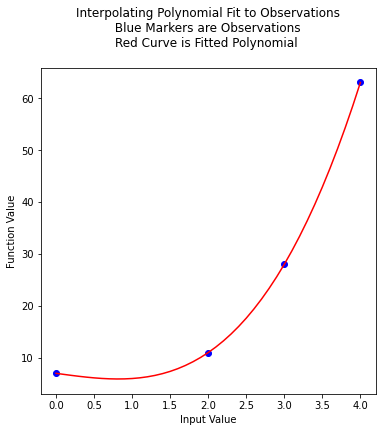

In [56]:
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (6,6)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(xtable, ytable ,color ='blue') # The observations as points
matplotlib.pyplot.plot(xpred, ypred, color ='red') # the polynomial
matplotlib.pyplot.xlabel("Input Value") 
matplotlib.pyplot.ylabel("Function Value") 
mytitle = "Interpolating Polynomial Fit to Observations\n "
mytitle += "Blue Markers are Observations " + "\n"
mytitle += "Red Curve is Fitted Polynomial "+ "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

### Exercises

In a radiation-induced polymerization study, a gamma source was used to give measured doses of radiation. The dosage varied with position in the apparatus, with the following data being recorded:

|Position from emitter (inches)  | Dosage Rate, $10^5$ rads/hr  |
|:---  | :--- |
|0   |1.90|
|0.5 |2.39|
|1.0 |2.71|
|1.5 |2.98|
|2.0 |3.20|
|3.0 |3.20|
|3.5 |2.98|
|4.0 |2.74|

For some reason, the reading at 2.5 inches was not reported, but the value of radiation at that distance is needed; estimate the dosage level at 2.5 inches using an interpolation-type prediction engine.  Plot the interpolating function as well as the observations.

In [ ]:
# Observations
position = [0,0.5,1.0,1.5,2.0,3.0,3.5,4.0]
dosage = [1.90,2.39,2.71,2.98,3.20,3.20,2.98,2.74]
#
xpred = [] # empty list to store results for plotting
ypred = [] # empty list to store results for plotting
#
step_size = 0.10  # step size
how_many = int((position[len(position)-1])/step_size)
# build the predictions
for i in range(how_many+1): 
    xpred.append(float(i)*step_size)
    ypred.append(lagint(position,dosage,float(i)*step_size))
#print(lagint(xtable,ytable,xwant))
myfigure = matplotlib.pyplot.figure(figsize = (6,6)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(position,dosage ,color ='blue') # The observations as points
matplotlib.pyplot.plot(xpred, ypred, color ='red') # the polynomial
matplotlib.pyplot.xlabel("Distance") 
matplotlib.pyplot.ylabel("Dosage") 
mytitle = "Interpolating Polynomial Fit to Observations\n "
mytitle += "Blue Markers are Observations " + "\n"
mytitle += "Red Curve is Fitted Polynomial "+ "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

lagint(position,dosage,2.5)

### Interpolation References
- Lagrangian Interpolation (using R packages) [https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html](https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html)

- Lagrangian Interpolation (Video) [https://www.youtube.com/watch?v=_zK_KhHW6og](https://www.youtube.com/watch?v=_zK_KhHW6og)

- Lagrange Polynomials [https://en.wikipedia.org/wiki/Lagrange_polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial)

- Gerald, C.F., and Wheatley, P. O., 1984. Applied Numerical Analysis. 3rd Ed. Addison Wesley, Inc. , pp. 171-210.

- Westerink, J.J. 2018. CE 30125 Computational Methods, Department of Civil and Environmental Engineering and Earth Sciences University of Notre Dame, Notre Dame IN 46556 [https://coast.nd.edu/jjwteach/www/www/30125/pdfnotes/lecture3_6v13.pdf](https://coast.nd.edu/jjwteach/www/www/30125/pdfnotes/lecture3_6v13.pdf)

# Integration of Functions

At this point we have enough Python to consider doing some useful computations. We
will start with numerical integration because it is useful and only requires count-controlled
repetition and single subscript lists.

## Background

Numerical integration is the numerical approximation of

\begin{equation}
I = \int_a^b f(x)dx
\end{equation}

Consider the problem of determining the shaded area under the curve $y = f(x)$ from $x = a$ to $x = b$, as depicted in the figure below, and suppose that analytical integration is not feasible.

![figure1](schematic_panels.png)
     
The function may be known in tabular form from experimental measurements or it may be known in an analytical form. 
The function is taken to be continuous within the interval $a < x < b$. We may divide the area into $n$ vertical panels, each of width $\Delta x = (b - a)/n$, and then add the areas of all strips to obtain  $A~\approx \int ydx$.

A representative panel of area $A_i$ is shown with darker shading in the figure. Three useful numerical approximations are listed in the following sections.  The approximations differ in how the function is represented by the panels --- in all cases the function is approximated by known polynomial models between the panel end points.

In each case the greater the number of strips, and correspondingly smaller value of $\Delta x$, the more accurate the approximation. Typically, one can begin with a relatively small number of panels and increase the number until the resulting area approximation stops changing.

## Rectangular Panels 

The figure below is a schematic of a rectangular panels.  The figure is assuming the function structure is known and can be evaluated at an arbitrary location in the $\Delta x$ dimension.

![figure2](rect_panels.png)

Each panel is treated as a rectangle, as shown by the representative panel whose height $y_m$ is chosen visually so that the small cross-hatched areas are as nearly equal as possible. Thus, we form the sum $\sum y_m$ of the effective heights and multiply by $\Delta x$. For a function known in analytical form, a value for $y_m$ equal to that of the function at the midpoint $x_i + \Delta x /2$ may be calculated and used in the summation.

For tabulated functions, we have to choose to either take $y_m$ as the value at the left endpoint or right endpoint.    This limitation is often quite handy when we are trying to integrate a function that is integrable, but undefined on one endpoint.

Lets try some examples in Python.

Find the area under the curve $y= x\sqrt{1+x^2}$  from $x = 0$ to $x = 2$.

First lets read in the value for the lowerlimit, we will do some limited error checks to be sure user enters a number, but won't check that the number is non-negative.

In [57]:
# RectangularPanels.py
# Numerical Integration
print ("Program finds area under curve y = x * sqrt(1+x)")
# Get input data -- use error checking
yes = 0
while yes == 0:
    x_low = input("Enter a lower bound x_low \n")
    try:
        x_low = float(x_low)
        yes = 1
    except:
        print ("x_low really needs to be a number, try again \n")
# exit the while loop when finally have a valid number

Program finds area under curve y = x * sqrt(1+x)


Enter a lower bound x_low 
 2


Verify that value is indeed what we entered

In [58]:
print(x_low)

2.0


Now do the same for the upper limit, notice how we are using the ``yes`` variable.  We set a "fail" value, and demand input until we get "success".  The structure used here is called a ``try -- exception`` structure and is very common in programming.   Error checking is really important so that garbled input does not hang things up. 

In [59]:
yes = 0
while yes == 0:
    x_high = input("Enter an upper bound x_high \n")
    try:
        x_high = float(x_high)
        yes = 1
    except:
        print ("x_high really needs to be a number, try again \n")
# exit the while loop when finally have a valid number

Enter an upper bound x_high 
 4


Again verify!

In [60]:
print(x_high)

4.0


Now use the try - exception structure to input how many panels we wish to use.  Notice you can enter a negative value which will ultimately break things. Also observe this value is an integer.

In [61]:
yes = 0
while yes == 0:
    how_many = input("Enter how many panels \n")
    try:
        how_many = int(how_many)
        yes = 1
    except:
        print ("Panels really needs to be a number, try again \n")
# exit the while loop when finally have a valid number

Enter how many panels 
 5


Again verify!

In [62]:
print(how_many)

5


Now we can actually perform the integration by evaluating the function at the panel half-widths.
In this example we are using primitive arithmetic, so the $\sqrt{}$ is accomplished by exponentation, the syntax is ``c = a ** b`` is the operation $c = a^b$.

The integration uses an accumulator, which is a memory location where subsquent results are added (accumulated) back into the accumulator.  This structure is so common that there are alternate, compact syntax to perform this task, here it is all out in the open.

The counting loop where we evaluate the function at different ``x`` values, starts at 1 and ends at ``how_many+1`` because python ``for`` loops use an increment skip if equal structure. When the value in ``range`` equals ``how_many`` the ``for`` loop exits (``break`` is implied.)  A loop control structure starting from 0 is shown in the code as a comment line.  Simply uncomment this line, and comment the line just below to have the structure typical in python scripts.  In the start from 1 case, we want to evaluate at the last value of ``how_many``.  

In [63]:
# OK we should have the three things we need for evaluating the integral
delta_x = (x_high - x_low)/float(how_many)  # compute panel width
xx = x_low + delta_x/2 # initial value for x
### OK THIS IS THE ACTUAL INTEGRATOR PART ###
accumulated_area = 0.0  # initial value in an accumulator
#for i in range(0,how_many,1): #note we are counting from 0
for i in range(1,how_many+1,1): #note we are counting from 1
    accumulated_area = accumulated_area + ( xx * ( (1+xx**2)**(0.5) ) ) * delta_x
    xx = xx + delta_x
### AND WE ARE DONE INTEGRATING #############

Finally, we want to report our result

In [64]:
print ("Area under curve y = x * sqrt(1+x) from x = ",x_low,\
      " to x = ",x_high,"\n is approximately: ",accumulated_area)
# the backslash \
#       " to x = .....     lets us use multiple lines
# the \n is a "newline" character 

Area under curve y = x * sqrt(1+x) from x =  2.0  to x =  4.0 
 is approximately:  19.610958667237167


The code implements rudimentary error checking -- it forces us to enter numeric values for the lower and upper values of $x$ as well as the number of panels to use.  It does not check for undefined ranges and such, but you should get the idea -- notice that a large fraction of the entire program is error trapping; this devotion to error trapping is typical for professional programs where you are going to distribute executable modules and not expect the end user to be a programmer.

## Using the ``math`` package

The actual computations are done rather crudely -- there is a math package that would give us the ability to compute the square root as a function call rather than exponentiation to a real values exponent.

That is illustrated below

In [65]:
# RectangularPanels.py
# Numerical Integration
# Use built-in math functions
import math  # a package of math functions
# we are naming an object "sqrt" that will compute the square root
def sqrt (x):
        return math.sqrt(x)
# saves us having to type math.NAME every time we wish to use a function
# in this program not all that meaningful, but in complex programs handy!
print ("Program finds area under curve y = x * sqrt(1+x)")
# Get input data -- use error checking
yes = 0
while yes == 0:
    x_low = input("Enter a lower bound x_low \n")
    try:
        x_low = float(x_low)
        yes = 1
    except:
        print ("x_low really needs to be a number, try again \n")
yes = 0
while yes == 0:
    x_high = input("Enter an upper bound x_high \n")
    try:
        x_high = float(x_high)
        yes = 1
    except:
        print ("x_high really needs to be a number, try again \n")
yes = 0
while yes == 0:
    how_many = input("Enter how many panels \n")
    try:
        how_many = int(how_many)
        yes = 1
    except:
        print ("Panels really needs to be a number, try again \n")
delta_x = (x_high - x_low)/float(how_many)  # compute panel width
accumulated_area = 0.0  # initial value in an accumulator
xx = x_low + delta_x/2 # initial value for x
for i in range(1,how_many+1,1): #note we are counting from 1
    accumulated_area = accumulated_area + ( xx * sqrt(1+xx**2) ) * delta_x
    xx = xx + delta_x
print ("Area under curve y = x * sqrt(1+x) from x = ",x_low,\
      " to x = ",x_high,"\n is approximately: ",accumulated_area)



Program finds area under curve y = x * sqrt(1+x)


Enter a lower bound x_low 
 0
Enter an upper bound x_high 
 2
Enter how many panels 
 6


Area under curve y = x * sqrt(1+x) from x =  0.0  to x =  2.0 
 is approximately:  3.3793974379024605


## Trapezoidal Panels
The trapezoidal panels are approximated as shown in the figure below. 

![](trap_panels.png)

The area $A_i$ is the average height $(y_i + y_{i+1} )/2$ times $\Delta x$. Adding the areas gives the area approximation as tabulated.   For the example with the curvature shown, the approximation will be on the low side. For the reverse curvature, the approximation will be on the high side.  The trapezoidal approximation is commonly used with tabulated values.

The script below illustrates the trapezoidal method for approximating an integral.  In the example, the left and right panel endpoints in $x$ are set as separate variables $x_{left}$ and $x_{right}$ and incremented by $\Delta x$ as we step through the count-controlled repetition to accumulate the area.  The corresponding $y$ values are computed within the loop and averaged, then multiplied by $\Delta x$ and added to the accumulator.  Finally the $x$ values are incremented --- for grins, we used the += operator on the accumulator


In [66]:
# TrapezoidalPanels.py
# Numerical Integration
# Use built-in math functions
import math  # a package of math functions
# we are naming an object "sqrt" that will compute the square root
def sqrt (x):
        return math.sqrt(x)
# saves us having to type math.NAME every time we wish to use a function
# in this program not all that meaningful, but in complex programs handy!
print ("Program finds area under curve y = x * sqrt(1+x)")
# Get input data -- use error checking
yes = 0
while yes == 0:
    x_low = input("Enter a lower bound x_low \n")
    try:
        x_low = float(x_low)
        yes = 1
    except:
        print ("x_low really needs to be a number, try again \n")
yes = 0
while yes == 0:
    x_high = input("Enter an upper bound x_high \n")
    try:
        x_high = float(x_high)
        yes = 1
    except:
        print ("x_high really needs to be a number, try again \n")
yes = 0
while yes == 0:
    how_many = input("Enter how many panels \n")
    try:
        how_many = int(how_many)
        yes = 1
    except:
        print ("Panels really needs to be a number, try again \n")
delta_x = (x_high - x_low)/float(how_many)  # compute panel width
accumulated_area = 0.0      # initial value in an accumulator
x_left = x_low              # initial value for x_left edge panel
x_right = x_left + delta_x  # initial value for x_right edge panel
for i in range(1,how_many+1,1): #note we are counting from 1
    y_left = ( x_left* sqrt(1+x_left**2) )
    y_right = ( x_right* sqrt(1+x_right**2) )
    accumulated_area += + (1./2.) * ( y_left + y_right ) * delta_x
    x_left += delta_x
    x_right += delta_x
print ("Area under curve y = x * sqrt(1+x) from x = ",x_low,\
      " to x = ",x_high,"\n is approximately: ",accumulated_area)


Program finds area under curve y = x * sqrt(1+x)


Enter a lower bound x_low 
 0
Enter an upper bound x_high 
 8
Enter how many panels 
 9


Area under curve y = x * sqrt(1+x) from x =  0.0  to x =  8.0 
 is approximately:  175.33954986737925


## Parabolic Panels
Parabolic panels approximate the shape of the panel with a parabola.  The area between the chord and the curve (neglected in the trapezoidal solution) may be accounted for by approximating the function with a parabola passing through the points defined by three successive values of $y$.

![](para-panels.png)

This area may be calculated from the geometry of the parabola and added to the trapezoidal area of the pair of strips to give the area $\Delta A$ of the pair as illustrated. Adding all of the $\Delta A$s produces the tabulation shown, which is known as Simpson's rule. To use Simpson's rule, the number $n$ of strips must be even.

The same example as presented for rectangular panels is repeated, except using parabolic panels.  The code is changed yet again because we will evaluate at each end of the panel as well as at an intermediate value.

In [67]:
# ParabolicPanels.py
# Numerical Integration
# Use built-in math functions
import math  # a package of math functions
# we are naming an object "sqrt" that will compute the square root
def sqrt (x):
        return math.sqrt(x)
# saves us having to type math.NAME every time we wish to use a function
# in this program not all that meaningful, but in complex programs handy!
print ("Program finds area under curve y = x * sqrt(1+x)")
# Get input data -- use error checking
yes = 0
while yes == 0:
    x_low = input("Enter a lower bound x_low \n")
    try:
        x_low = float(x_low)
        yes = 1
    except:
        print ("x_low really needs to be a number, try again \n")
yes = 0
while yes == 0:
    x_high = input("Enter an upper bound x_high \n")
    try:
        x_high = float(x_high)
        yes = 1
    except:
        print ("x_high really needs to be a number, try again \n")
yes = 0
while yes == 0:
    how_many = input("Enter how many panels \n")
    try:
        how_many = int(how_many)
        yes = 1
    except:
        print ("Panels really needs to be a number, try again \n")
delta_x = (x_high - x_low)/float(how_many)  # compute panel width
accumulated_area = 0.0         # initial value in an accumulator
x_left   = x_low               # initial value for x_left edge panel
x_middle = x_left   + delta_x  # initial value for x_middle edge panel
x_right  = x_middle + delta_x  # initial value for x_right edge panel
how_many = int(how_many/2)     # using 2 panels every step, so 1/2 many steps -- force integer result 
for i in range(1,how_many+1,1): #note we are counting from 1
    y_left   = ( x_left   * sqrt(1+   x_left**2) )
    y_middle = ( x_middle * sqrt(1+ x_middle**2) )
    y_right  = ( x_right  * sqrt(1+  x_right**2) )
    accumulated_area = accumulated_area + \
                       (1./3.) * ( y_left + 4.* y_middle + y_right ) * delta_x
    x_left   = x_left   + 2*delta_x
    x_middle = x_left   +   delta_x
    x_right  = x_middle +   delta_x
print ("Area under curve y = x * sqrt(1+x) from x = ",x_low,\
      " to x = ",x_high,"\n is approximately: ",accumulated_area)



Program finds area under curve y = x * sqrt(1+x)


Enter a lower bound x_low 
 0
Enter an upper bound x_high 
 1
Enter how many panels 
 4


Area under curve y = x * sqrt(1+x) from x =  0.0  to x =  1.0 
 is approximately:  0.6094186631272838


If we study all the forms of the numerical method we observe that the numerical integration method is really the sum of function values at specific locations in the interval of interest, with each value multiplied by a specific weight.

In this development the weights were based on polynomials, but other method use different weighting functions.  An extremely important method is called gaussian quadrature. This method is valuable because one can approximate convolution integrals quite effectively using quadrature routines, while the number of function evaluations for a polynomial based approximation could be hopeless.

When the function values are tabular, we are going to have to accept the rectangular (with adaptations) and trapezoidal as our best tools to approximate an integral because we don't have any really effective way to evaluate the function between the tabulated values.

---
# Integration of Tabular Data

This section is going to work with tabular data -- different from function evaluation, but
similar. To be really useful, we need to learn how to read data from a file; manually
entering tabular data is really time consuming, error prone, and just plain idiotic.

So in this chapter we will learn how to read data from a file into a list, then we can process
the list as if it were a function and integrate its contents.

### Reading from a file --- open, read, close files

First, lets consider a file named ``MyFile.txt``.   The extension is important so that the Shell does not think it is a Python script.
The contents of ``MyFile.txt`` are:

    1  1
    2  4
    3  9
    4  16
    5  25

The code fragment below, will let us look at the file (already existing in our local directory)

In [68]:
import subprocess # lets us run "shell" commands and recover stdio stream
usefull_cat_call = subprocess.run(["cat","MyFile.txt"], stdout=subprocess.PIPE, text=True) # this is the call to run the bash command "cat MyFile.txt" which will display the contents of the file if it exists.
print(usefull_cat_call.stdout)

1  1
2  4
3  9
4  16
5  25


Now that we know that the file exists,to read the contents into a Python script we have to do the following:

- Open a connection to the file --- this is a concept common to all languages, it might be called something different, but the program needs to somehow know the location and name of the file.
    
- Read the contents into an object --- we have a lot of control on how this gets done, for the time being we won't exercise much control yet.  When you do substantial programs, you will depend on the control of the reads (and writes).
    
- Disconnect the file --- this too is common to all languages.  Its a really easy step to forget.  Not a big deal if the program ends as planned but terrible if there is a error in the program and the connection is still open.  Usually nothing bad happens, but with an open connection it is possible for the file to get damaged.   If that file represents millions of customers credit card numbers, that's kind of a problem, and time to go work on your resume, or get your passport collection out and choose a country without extradition.
    
The code fragment below performs these three tasks and prints the things we read

In [69]:
Afile = open("MyFile.txt","r") # open a connection to the file; set to "read"
# read the five lines
line1 = Afile.readline()
line2 = Afile.readline()
line3 = Afile.readline()
line4 = Afile.readline()
line5 = Afile.readline()
Afile.close() # disconnect from the file
# echo the input
print(line1,end="")
print(line2,end="")
print(line3,end="")
print(line4,end="")
print(line5,end="")

1  1
2  4
3  9
4  16
5  25

### Read into a list
A far more useful and elegant way to read from a file is to use a ``for`` loop.   The attribute ``line`` within a file is an iterable, hence construction the loop is pretty straightforward.   

A script fragment below does the same thing as the example above, but uses a ``for`` loop to accomplish stepping through the file.   

Additionally, I have added a counter to keep track of how many lines were read --- in a lot of engineering programs, the number of things read becomes important later in a program, hence it is usually a good idea to capture the count when the data are first read.

First lets work out if we can automatically detect the end of the file.  So this script just reads and prints the attribute ``line`` from object ``Afile``.  
Notice how the print statement is changed, to suppress the extra line feed.

In [70]:
Afile = open("MyFile.txt","r") # open a connection to the file; set to "read"
# read using a for loop, exit when at end of file  and report line count
how_many_lines = 0 # start our counter!
for line in Afile:
    print(line,end="")
    how_many_lines += 1
Afile.close() # disconnect from the file
print("\nFile has ",how_many_lines," records (lines)")

1  1
2  4
3  9
4  16
5  25
File has  5  records (lines)


Now we will add a list to receive the input, here it reads the file above as a string into a list ``xy``, then splits that list and places the contents into two other lists, ``x`` and ``y``.  The script has several parts to discuss.   First, the destination variables (lists) must be created -- I used the null list concept here because I don't know how big the list is until I read the list.  
Next I used the ``.append()`` method which operates on the ``xy`` list.  
The arguments of the method ``[str(n) for n in line.strip().split()]`` tells the program that the elements are to be interpreted as a string, and to split (split) the line into sub-strings based on a null delimiter (whitespace), and to remove all the whitespace (strip) characters.   

Once the line is split, the strings are appended into the ``xy`` list.  The ``xy`` list is printed to show that it is a list of 5 things, each thing being a string comprised of two sets of characters separated by a comma.   ``xy`` is a list of strings.

The next section of the code then uses the ``pair`` function within another ``.append()`` method to break the character sets in each element of ``xy`` into two parts ``x`` and ``y``.  
Lastly during the pair operation, the code also converts the data into real values (float) and then prints the data in two columns.    
This seems like a lot of work, but we could easily get this code to be super reliable, then save it as a function and never have to write it again.   That too comes later -- suffice to say for now we can read a file, parse its contents into two lists $x$ and $y$.  Thus we are now able to integrate tabular data.

In [71]:
xy = [] # null list to store the lines
x  = [] # a null list for the first column
y  = [] # a null list for the second column
Afile = open("MyFile.txt","r") # open a connection to the file; set to "read"
# read using a for loop, exit when at end of file  and report line count
how_many_lines = 0 # start our counter!
for line in Afile:
    print(line,end="")
    xy.append([str(n) for n in line.strip().split()]) # append line to xy, split the line on whitespace, strip out whitespace
    how_many_lines += 1
Afile.close() # disconnect from the file
print("\nFile has ",how_many_lines," records (lines)")
print("The list is: ",end="")
print(xy) # the list
for pair in xy:  # parse into x and y
    x.append(float(pair[0]))
    y.append(float(pair[1]))
# verify parsed
for i in range (0,how_many_lines,1):
    print("x = ",x[i]," y = ",y[i])


1  1
2  4
3  9
4  16
5  25
File has  5  records (lines)
The list is: [['1', '1'], ['2', '4'], ['3', '9'], ['4', '16'], ['5', '25']]
x =  1.0  y =  1.0
x =  2.0  y =  4.0
x =  3.0  y =  9.0
x =  4.0  y =  16.0
x =  5.0  y =  25.0


### Integrating the Tabular Data
Suppose instead of a function we only have tabulations and wist to estimate the area under the curve represented by the tabular values.  Then our integration rules from the prior chapter still work more or less, except the rectangular panels will have to be shifted to either the left edge or right edge of a panel (where the tabulation exists).   

Lets just examine an example.  Suppose some measurement technology produced a table of related values.   
The excitation variable is ``x`` and ``f(x)`` is the response. 

        x    f(x) 
       1.0  1.543 
       1.1  1.668 
       1.2  1.811 
       1.3  1.971 
       1.4  2.151 
       1.5  2.352 
       1.6  2.577 
       1.7  2.828 
       1.8  3.107
       
To integrate this table using the trapezoidal method is straightforward.  
We will modify our earlier code to read the table (which we put into a file), and compute the integral. 

In [72]:
# My Tabular Integration
# Integrate a table of values using Trapezoidal Panels
xy = [] # null list to store the lines
x  = [] # a null list for the first column
y  = [] # a null list for the second column
Afile = open("MyTableOfData.txt","r") # open a connection to the file; set to "read"
# read using a for loop, exit when at end of file  and report line count
how_many_lines = 0 # start our counter!
for line in Afile:
    print(line,end="")
    xy.append([str(n) for n in line.strip().split()]) # append line to xy, split the line on whitespace, strip out whitespace
    how_many_lines += 1
Afile.close() # disconnect from the file
print("\nFile has ",how_many_lines," records (lines)")
print("The list is: ",end="")
print(xy) # the list
for pair in xy:  # parse into x and y
    x.append(float(pair[0]))
    y.append(float(pair[1]))
# verify parsed
for i in range (0,how_many_lines,1):
    print("x = ",x[i]," y = ",y[i])
# now the actual integration
accumulated_area = 0 # an accumulator
for i in range(0,how_many_lines-1,1): #index stops at n-1 things because each panel evaluated at both ends
    delta_x = x[i+1]-x[i]
    height =(y[i+1]+y[i])/2.0
    accumulated_area += height*delta_x
print("Area = ",accumulated_area)  # report the result


1.0  1.543 
1.1  1.668 
1.2  1.811 
1.3  1.971 
1.4  2.151 
1.5  2.352 
1.6  2.577 
1.7  2.828 
1.8  3.107
File has  9  records (lines)
The list is: [['1.0', '1.543'], ['1.1', '1.668'], ['1.2', '1.811'], ['1.3', '1.971'], ['1.4', '2.151'], ['1.5', '2.352'], ['1.6', '2.577'], ['1.7', '2.828'], ['1.8', '3.107']]
x =  1.0  y =  1.543
x =  1.1  y =  1.668
x =  1.2  y =  1.811
x =  1.3  y =  1.971
x =  1.4  y =  2.151
x =  1.5  y =  2.352
x =  1.6  y =  2.577
x =  1.7  y =  2.828
x =  1.8  y =  3.107
Area =  1.7683000000000002


Cool, it seems to work -- now tidy the code a bit by suppressing extra outputs

In [73]:
# My Tabular Integration
# Integrate a table of values using Trapezoidal Panels
xy = [] # null list to store the lines
x  = [] # a null list for the first column
y  = [] # a null list for the second column
Afile = open("MyTableOfData.txt","r") # open a connection to the file; set to "read"
# read using a for loop, exit when at end of file  and report line count
how_many_lines = 0 # start our counter!
for line in Afile:
    ##print(line,end="")
    xy.append([str(n) for n in line.strip().split()]) # append line to xy, split the line on whitespace, strip out whitespace
    how_many_lines += 1
Afile.close() # disconnect from the file
print("\nRecords read =: ",how_many_lines)
##print("The list is: ",end="")
##print(xy) # the list
for pair in xy:  # parse into x and y
    x.append(float(pair[0]))
    y.append(float(pair[1]))
# verify parsed
for i in range (0,how_many_lines,1):
    print("x = ",x[i]," y = ",y[i])
# now the actual integration
accumulated_area = 0 # an accumulator
for i in range(0,how_many_lines-1,1): #index stops at n-1 things because each panel evaluated at both ends
    delta_x = x[i+1]-x[i]
    height =(y[i+1]+y[i])/2.0
    accumulated_area += height*delta_x
print("Area = ",accumulated_area)  # report the result


Records read =:  9
x =  1.0  y =  1.543
x =  1.1  y =  1.668
x =  1.2  y =  1.811
x =  1.3  y =  1.971
x =  1.4  y =  2.151
x =  1.5  y =  2.352
x =  1.6  y =  2.577
x =  1.7  y =  2.828
x =  1.8  y =  3.107
Area =  1.7683000000000002


Realistically the only other simple integration method for tabular data is the rectangular rule, either using the left edge of a panel or the right edge of a panel (and I suppose you could do both and average the result which would be the trapezoidal method).

## Exercises

1)  Approximate $\int_0^2 f(x) dx$ from the tabulation in the Table below:
   
    x     f(x)
    0.00  1.0000 
    0.12  0.8869 
    0.53  0.5886 
    0.87  0.4190 
    1.08  0.3396 
    1.43  0.2393 
    2.00  0.1353 

In [74]:
#

2) The table below is a tabulation of various values of the hyperbolic cosine function. 

    x     cosh(x)
    1.0  1.54308063481524  
    1.1   1.66851855382226  
    1.2   1.81065556732437  
    1.3   1.97091423032663  
    1.4   2.15089846539314  
    1.5   2.35240961524325  
    1.6   2.57746447119489  
    1.7   2.82831545788997  
    1.8   3.10747317631727  
    2.0   3.76219569108363  
    2.2   4.56790832889823  
    2.4   5.55694716696551  
    2.6   6.76900580660801  
    2.8   8.25272841686113  
    3.0   10.0676619957778  
    3.3   13.5747610440296  
    3.6   18.3127790830626  
    3.9   24.711345508488  
    4.2   33.3506633088728  
    4.6   49.7471837388392  
    5.0   74.2099485247878  
    5.5   122.348009517829  
    6.0   201.715636122456  
    7.0   548.317035155212  
    8.0   1490.47916125218  
    9.0   4051.54202549259  

Approximate $\int_1^{9.0} cosh(x) dx$ from the tabulation above.

#

3) The table below is a tabulation of various values of the hyperbolic cosine function. 

    x     cosh(x)
    1.0  1.54308063481524  
    1.1   1.66851855382226  
    1.2   1.81065556732437  
    1.3   1.97091423032663  
    1.4   2.15089846539314  
    1.5   2.35240961524325  
    1.6   2.57746447119489  
    1.7   2.82831545788997  
    1.8   3.10747317631727  
    2.0   3.76219569108363  
    2.2   4.56790832889823  
    2.4   5.55694716696551  
    2.6   6.76900580660801  
    2.8   8.25272841686113  
    3.0   10.0676619957778  
    3.3   13.5747610440296  
    3.6   18.3127790830626  
    3.9   24.711345508488  
    4.2   33.3506633088728  
    4.6   49.7471837388392  
    5.0   74.2099485247878  
    5.5   122.348009517829  
    6.0   201.715636122456  
    7.0   548.317035155212  
    8.0   1490.47916125218  
    9.0   4051.54202549259  
    
Approximate $\int_1^{4.2} cosh(x) dx$ from the tabulation above.  Briefly explain how you handle starting and stopping the integration from values that are intermediate and are tabulated.

In [75]:
#

4) (Advanced) The table below is a tabulation of various values of the hyperbolic cosine function. 

    x     cosh(x)
    1.0  1.54308063481524  
    1.1   1.66851855382226  
    1.2   1.81065556732437  
    1.3   1.97091423032663  
    1.4   2.15089846539314  
    1.5   2.35240961524325  
    1.6   2.57746447119489  
    1.7   2.82831545788997  
    1.8   3.10747317631727  
    2.0   3.76219569108363  
    2.2   4.56790832889823  
    2.4   5.55694716696551  
    2.6   6.76900580660801  
    2.8   8.25272841686113  
    3.0   10.0676619957778  
    3.3   13.5747610440296  
    3.6   18.3127790830626  
    3.9   24.711345508488  
    4.2   33.3506633088728  
    4.6   49.7471837388392  
    5.0   74.2099485247878  
    5.5   122.348009517829  
    6.0   201.715636122456  
    7.0   548.317035155212  
    8.0   1490.47916125218  
    9.0   4051.54202549259  

Approximate $\int_1^{4.0} cosh(x) dx$ from the tabulation above.  Explain how handled working with values that fall between tabulated values.

#

# References
- [https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html](https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html)

- Lagrangian Interpolation (Video) [https://www.youtube.com/watch?v=_zK_KhHW6og](https://www.youtube.com/watch?v=_zK_KhHW6og)

- Lagrange Polynomials [https://en.wikipedia.org/wiki/Lagrange_polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial)